In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def converter(instr):
    return np.fromstring(instr[1:-1],sep=' ')

In [3]:
#read in my data. There are 3 
df = pd.read_csv('train_data.txt', converters={'xvalues':converter, 'ymeasured':converter})
print(len(df['xvalues']))

1785


In [4]:
lengths = []

for i, row in df.iterrows():
    #print(row["ispeaks"])
    if row["ispeaks"] == 'y':
        #print('debug')
        row["ispeaks"] = 1
    else: row["ispeaks"] = 0
        
    lengths.append(len(row['ymeasured']))
    
#df.head()
#print(df["ispeaks"])
maxlen = max(lengths)
#maxlen

In [5]:
import keras
from sklearn.model_selection import train_test_split

labels_and_features_df = df
labels_arr = labels_and_features_df["ispeaks"]
labels_arr = labels_arr.astype('int64')
#for element in labels_arr:
#    if element != 0:
#        print(element)

labels_arr = keras.utils.to_categorical(labels_arr)

print(labels_arr)

features_arr = []

for i, row in df.iterrows():
    ymeas = []
    for val in row[1]:
        ymeas.append(val)
    while len(ymeas) != maxlen:
        ymeas.append(0)
        
    ymeas = np.array(ymeas)
    features_arr.append(ymeas)
    
features_arr = np.array(features_arr)
    
#print(np.shape(features_arr))

X_train, X_test, y_train, y_test = train_test_split(features_arr, labels_arr, test_size=0.30)

#print(y_train)

/home/ben/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='sigmoid', input_dim = maxlen))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
history =model.fit(X_train,y_train,epochs = 20,validation_split=0.20)
metric_arr = model.evaluate(X_test,y_test)
print("Loss: " + str(metric_arr[0]), "\nAccuracy: " + str(metric_arr[1]))

Train on 999 samples, validate on 250 samples
Epoch 1/20
999/999 [==============================] - 0s 158us/step - loss: 0.4352 - acc: 0.8599 - val_loss: 0.3594 - val_acc: 0.8640
Epoch 2/20
999/999 [==============================] - 0s 39us/step - loss: 0.3520 - acc: 0.8649 - val_loss: 0.3351 - val_acc: 0.8640
Epoch 3/20
999/999 [==============================] - 0s 40us/step - loss: 0.3343 - acc: 0.8649 - val_loss: 0.3182 - val_acc: 0.8640
Epoch 4/20
999/999 [==============================] - 0s 39us/step - loss: 0.3206 - acc: 0.8649 - val_loss: 0.3025 - val_acc: 0.8640
Epoch 5/20
999/999 [==============================] - 0s 39us/step - loss: 0.3095 - acc: 0.8649 - val_loss: 0.2915 - val_acc: 0.8640
Epoch 6/20
999/999 [==============================] - 0s 40us/step - loss: 0.2990 - acc: 0.8649 - val_loss: 0.2781 - val_acc: 0.8640
Epoch 7/20
999/999 [==============================] - 0s 40us/step - loss: 0.2888 - acc: 0.8649 - val_loss: 0.2650 - val_acc: 0.8640
Epoch 8/20
999/999 [==

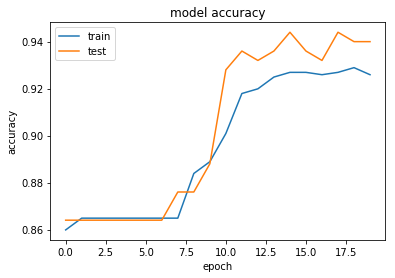

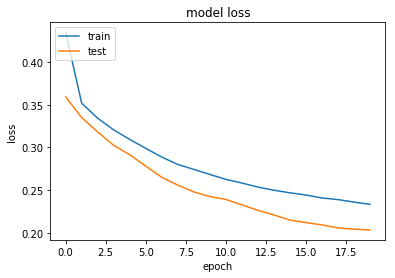

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#overall normal sets of peaks are 86% of the total.